In [1]:
import os
import pandas as pd
import tabula
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Check working directory

In [2]:
os.chdir(os.getcwd())

Define input and output paths 

In [3]:
input_paths = [file for file in os.listdir() if file.endswith(".pdf")]
output_paths = input_paths.copy()
for i in range(len(output_paths)): output_paths[i] = output_paths[i].replace("pdf", "csv")

Low and high bound on data

In [4]:
LB = 25
HB = 30

PIs calculated

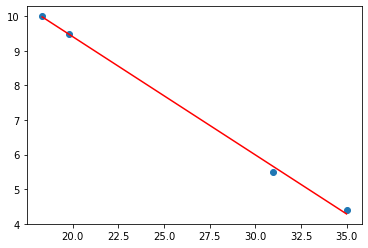

572 9-15-2022 2-31-17 PM_Method Report.csv
R-squared:  0.9984300805801811
    Unnamed: 0    Time    Area  Area %  Height  Height %  \
2            3  26.283    5811    0.27    1368      0.32   
3            4  26.600  204968    9.66   37970      8.88   
4            5  26.683  491679   23.18   72311     16.92   
5            6  26.775  201791    9.51   45762     10.71   
6            7  27.000   72577    3.42   16597      3.88   
7            8  27.075  169273    7.98   21290      4.98   
8            9  27.217   44731    2.11    8015      1.88   
9           10  27.433   34956    1.65   10157      2.38   
10          11  27.500   33670    1.59    3952      0.92   
11          12  27.883    9236    0.44    2145      0.50   

                        PI  
2    [[7.263236679671836]]  
3    [[7.154846640089463]]  
4    [[7.126466913637296]]  
5   [[7.0950098674493525]]  
6    [[7.018076874054923]]  
7    [[6.992432542923446]]  
8    [[6.943879275981184]]  
9    [[6.870023602322531]]  
10  

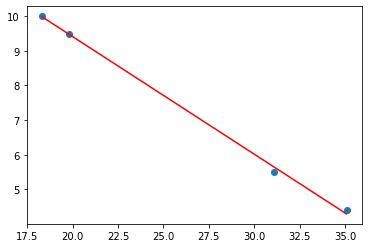

573 9-15-2022 3-29-15 PM_Method Report.csv
R-squared:  0.998532783179196
    Unnamed: 0    Time    Area  Area %  Height  Height %  \
2            3  26.317    4421    0.20    1093      0.25   
3            4  26.633  211358    9.43   40799      9.49   
4            5  26.725  611959   27.29   76381     17.77   
5            6  26.833  202878    9.05   45041     10.48   
6            7  27.067   72931    3.25   15846      3.69   
7            8  27.150  174399    7.78   20825      4.84   
8            9  27.300   36971    1.65    7293      1.70   
9           10  27.508   32306    1.44    9367      2.18   
10          11  27.575   30553    1.36    3698      0.86   
11          12  27.958    8206    0.37    1949      0.45   

                        PI  
2    [[7.267023893209188]]  
3      [[7.1596730242393]]  
4    [[7.128418973779711]]  
5    [[7.091729436283675]]  
6    [[7.012235438375592]]  
7   [[6.9840388493740075]]  
8    [[6.933081158407289]]  
9    [[6.862419826933438]]  
10   

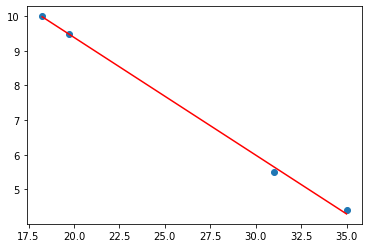

574 9-15-2022 4-27-12 PM_Method Report.csv
R-squared:  0.998505544128863
    Unnamed: 0    Time    Area  Area %  Height  Height %  \
2            3  26.258    4282    0.20    1056      0.25   
3            4  26.575  188215    8.92   39292      9.35   
4            5  26.658  540833   25.63   75332     17.92   
5            6  26.750  209573    9.93   45358     10.79   
6            7  26.975   64070    3.04   14474      3.44   
7            8  27.058  159708    7.57   20162      4.80   
8            9  27.208   34352    1.63    6940      1.65   
9           10  27.417   59328    2.81    8622      2.05   
10          11  27.867    7056    0.33    1772      0.42   

                       PI  
2   [[7.260171175320039]]  
3   [[7.152308533564179]]  
4   [[7.124066895501917]]  
5   [[7.092762911143751]]  
6   [[7.016204253746057]]  
7   [[6.987962615683797]]  
8   [[6.936923510752003]]  
9   [[6.865809024547033]]  
10  [[6.712691709751647]]  


array([7.12646691, 7.12841897, 7.1240669 ])

In [9]:
PI = []
for path in output_paths:
    #read csv and select for stardards peaks
    df = pd.read_csv(path, header=0)
    df = df[(df['Time']<LB)|(df['Time']>HB)]
    
    #sort for highest peaks and assign PIs on the standards
    df = df.sort_values("Height %", ascending=False)[0:4]
    df = df.sort_values("Time")["Time"]
    df1 = pd.DataFrame({"Time":df.values, "pH":np.array([10.0, 9.5, 5.5, 4.4])})
    
    #build and display linear regression
    X = df1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = df1.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()
    print(path)
    print("R-squared: ", linear_regressor.score(X,Y))
    
    #Reset the csv and select for the sample peaks
    df = pd.read_csv(path, header=0)
    df = df[(df['Time']>LB) & (df['Time']<HB)]
    df["PI"] = df['Time'].apply(lambda x: x*linear_regressor.coef_ + linear_regressor.intercept_)
    print(df)
    #df['Time'][df['Height']==df['Height'].max()]
    
    #PI prediction
    PI = np.append(PI, (df['Time'][df['Height']==df['Height'].max()].values*linear_regressor.coef_ + linear_regressor.intercept_))
PI


In [ ]:
out =  pd.DataFrame({"run":output_paths, "PI": PI})
out


In [ ]:
out.to_csv("PI.csv")